In [42]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [44]:
def groupCreditScore(var):
    if 299< var <600:
        return 450
    if 599< var <650:
        return 625
    if 649< var <700:
        return 675
    if 699< var <750:
        return 725
    if 749< var <800:
        return 775
    else:
        return 825
        

#### Get Data from pickle object

In [45]:
dfWithG=pd.read_pickle('data/dataframe.pkl')


#### Size the data

In [46]:
dfWithG.groupby(['year','quarter']).size()

year  quarter
2009  1          109857
      2          104205
      3           98607
      4           94714
2010  1           91327
      2           88217
      3           84878
      4           81175
2011  1           77495
      2           74321
      3           71768
      4           69070
2012  1           66132
      2           63265
      3           60494
      4           57710
2013  1           54826
      2           51645
      3           48789
      4           46472
2014  1           44740
dtype: int64

In [4]:
dfWithG.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,year,quarter,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,MORTGAGE INSURANCE PERCENTAGE,CLTV,DTI Ratio,change-current,change-chained
0,F110Q1000001,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
1,F110Q1000001,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,777,N,000,43.0,26.0,3.0,1.6
2,F110Q1000003,2010-02-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
3,F110Q1000003,2010-03-01,0.0,0,359,F,N,00,4.875,0.0,2010,1,727,N,000,61.0,26.0,3.0,1.6
4,F110Q1000004,2010-03-01,0.0,0,360,F,N,00,4.875,0.0,2010,1,794,N,000,58.0,31.0,3.0,1.6


#### Relation between CREDIT SCORE  and CURRENT INTEREST RATE

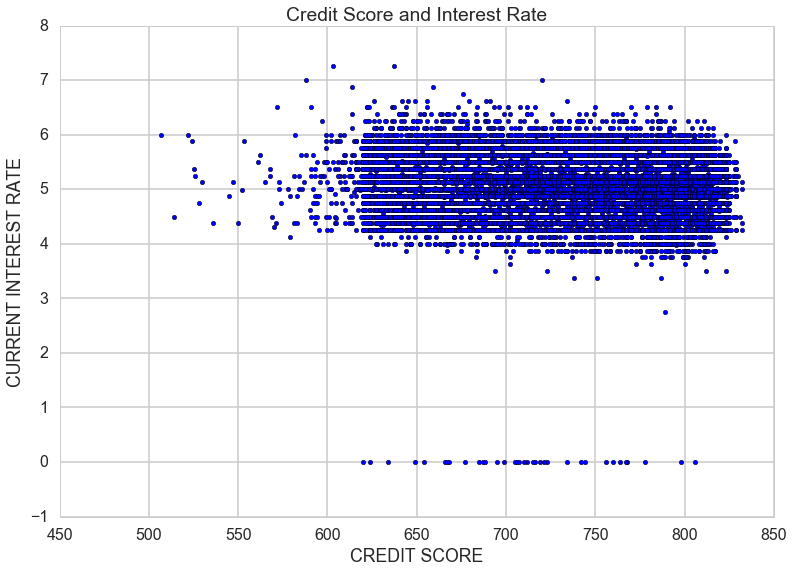

In [5]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT INTEREST RATE','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
#df3=df3.sample(frac=0.01)
plt.scatter(df3['CREDIT SCORE'],df3['CURRENT INTEREST RATE'])
plt.xlabel('CREDIT SCORE')
plt.ylabel('CURRENT INTEREST RATE')
plt.title('Credit Score and Interest Rate')
plt.xlim(400,850)
plt.autoscale()

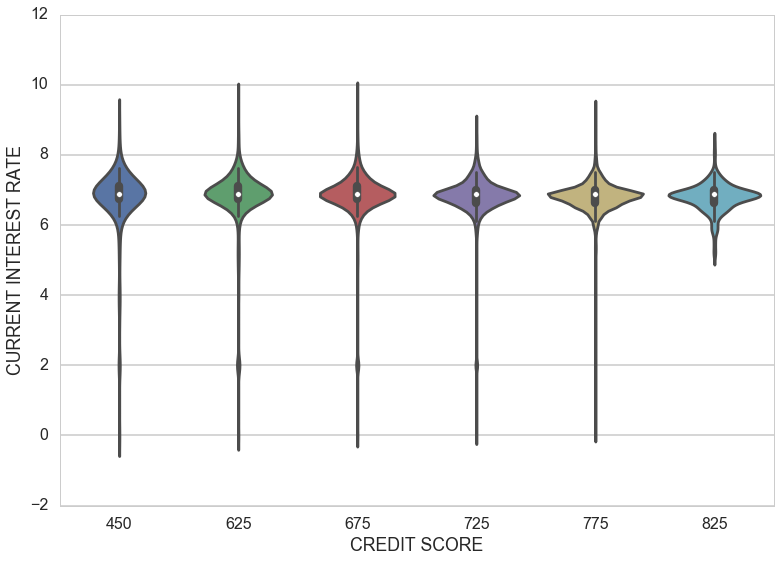

In [50]:

df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT INTEREST RATE','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
df3=df3[['CREDIT SCORE','CURRENT INTEREST RATE']]
df3['CREDIT SCORE']=df3['CREDIT SCORE'].apply(groupCreditScore);
df3
sns.violinplot(x="CREDIT SCORE", y="CURRENT INTEREST RATE", data=df3)

#### Relation between CREDIT SCORE  and LOAN TO VALUE Ratio

In [39]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CLTV','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
df3=df3[['CREDIT SCORE','CLTV']]
df4=df3.groupby('CREDIT SCORE').median().reset_index()
df4.corr(method='pearson')
#plt.scatter(df3['CREDIT SCORE'],df3['CLTV'])
#plt.xlabel('CREDIT SCORE')
#plt.ylabel('CLTV')
#plt.title('Credit Score and LTV')
#plt.xlim(400,850)
#plt.autoscale()

,CREDIT SCORE,CLTV
CREDIT SCORE,1.000000,0.351913
CLTV,0.351913,1.000000


#### Relation between CREDIT SCORE  and DEBT TO INCOME Ratio

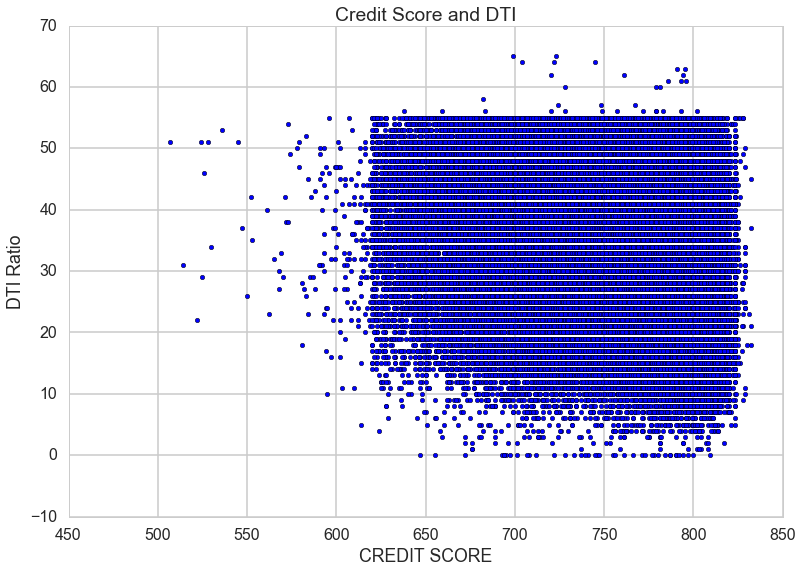

In [40]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','DTI Ratio','year','quarter']]
df1=df1[(df1['year']==2013) & (df1['quarter']==4)]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df3=df2.reset_index()
#df3=df3.sample(frac=0.01)
plt.scatter(df3['CREDIT SCORE'],df3['DTI Ratio'])
plt.xlabel('CREDIT SCORE')
plt.ylabel('DTI Ratio')
plt.title('Credit Score and DTI')
plt.xlim(400,850)
plt.autoscale()